# "Updraft Histograms"
> "Awesome summary"

- toc: true
- badges: true
- comments: true
- categories: [updrafts, histograms]
- image: images/histogram2d.png
- hide: false
- search_exclude: false

In [15]:
import tables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
file = tables.open_file('../../../Research/updraft_objects_20190227.mat')
file2 = tables.open_file('../../../Research/updraft_wnorm_20190227.mat')

In [2]:
CWIDTH = np.squeeze(file.root.CWIDTH[:])[:-1]
CWIDTH2 = np.squeeze(file.root.CWIDTH2[:])[:-1]
cwidth = np.concatenate((CWIDTH,CWIDTH2))

upZi = np.squeeze(file.root.upZi[:])
upZi2 = np.squeeze(file.root.upZi2[:])
Zi = np.concatenate((upZi,upZi2))

uparea = np.squeeze(file.root.uparea[:])
uparea2 = np.squeeze(file.root.uparea2[:])

upctime = file.root.upctime[:]
upctime2 = file.root.upctime2[:]

upspd = np.squeeze(file.root.upspd[:])[:-1]
upspd2 = np.squeeze(file.root.upspd2[:])[:-1]
uwind = np.concatenate((upspd,upspd2))

chordlength = CWIDTH*upspd
chordlength2 = CWIDTH2*upspd2


upwmax  = np.squeeze(file.root.upwmax[:])
upwmax2 = np.squeeze(file.root.upwmax2[:])
max_w = np.concatenate((upwmax,upwmax2))

upwmax_top = np.squeeze(file.root.upwmax_top[:])
upwmax_top2 = np.squeeze(file.root.upwmax_top2[:])
max_wtop = np.concatenate((upwmax_top,upwmax_top2))

upwmean = np.squeeze(file.root.upwmean[:])
upwmean2 = np.squeeze(file.root.upwmean2[:])

upwstar = np.squeeze(file.root.upwstar[:])
upwstar2 = np.squeeze(file.root.upwstar[:])

upxc = np.squeeze(file.root.upxc[:])
upxc2 = np.squeeze(file.root.upxc2[:])

upzbot = np.squeeze(file.root.upzbot[:]) 
upzbot2 = np.squeeze(file.root.upzbot2[:])

upzc = np.squeeze(file.root.upzc[:])
upzc2 = np.squeeze(file.root.upzc2[:])

upzx = np.squeeze(file.root.upzx[:])
upzx2 = np.squeeze(file.root.upzx2[:])

xideal = np.squeeze(file.root.xideal[:])
ximat = np.squeeze(file.root.ximat[:])

z34 = np.squeeze(file.root.z34[:])
z342 = np.squeeze(file.root.z342[:])

zideal = np.squeeze(file.root.zideal[:])
zimat = np.squeeze(file.root.zimat[:])

In [3]:
upz_norm=(0.5*(upzc+upzx))/upZi
upzxn=upzx/upZi

upz_norm2=(0.5*(upzc2+upzx2))/upZi2
upzxn2=upzx2/upZi2

updnorm=(upzx-upzbot)/upZi
updnorm2=(upzx2-upzbot2)/upZi2

upzbot_norm=upzbot/upZi
upzbot_norm2=upzbot2/upZi2


upzx_norm=upzx/upZi
upzx_norm2=upzx2/upZi2

idx=[]
idx2=[]
qtiles=[.25,.45,.65,.85,1.05,1.25]
qtiles=np.asarray(qtiles)

# qtiles=np.arange(.1,1.3,.1)
# print(qtiles)
# qtiles=np.asarray(qtiles)

for ii in range(len(qtiles)-1):
    idx.append(np.where((upz_norm>=qtiles[ii])&(upz_norm<qtiles[ii+1])))#&(upzbot_norm<=0.5)&(upzx_norm<=1.5)))
    idx2.append(np.where((upz_norm2>=qtiles[ii])&(upz_norm2<qtiles[ii+1])))#&(upzbot_norm2<=0.5)&(upzx_norm2<=1.5)))
    
print(idx,idx2)

[(array([   12,    20,    22, ..., 53720, 53722, 53723]),), (array([    8,    10,    13, ..., 53713, 53718, 53721]),), (array([    0,     2,     3, ..., 53712, 53715, 53724]),), (array([    4,     9,    26, ..., 53710, 53716, 53725]),), (array([    5,     6,    11, ..., 53702, 53704, 53714]),)] [(array([    2,    22,    25, ..., 52055, 52057, 52061]),), (array([    4,    14,    15, ..., 52058, 52059, 52062]),), (array([    1,    10,    20, ..., 52036, 52054, 52060]),), (array([    0,     3,     7, ..., 52050, 52056, 52067]),), (array([    5,     8,     9, ..., 52029, 52046, 52051]),)]


/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


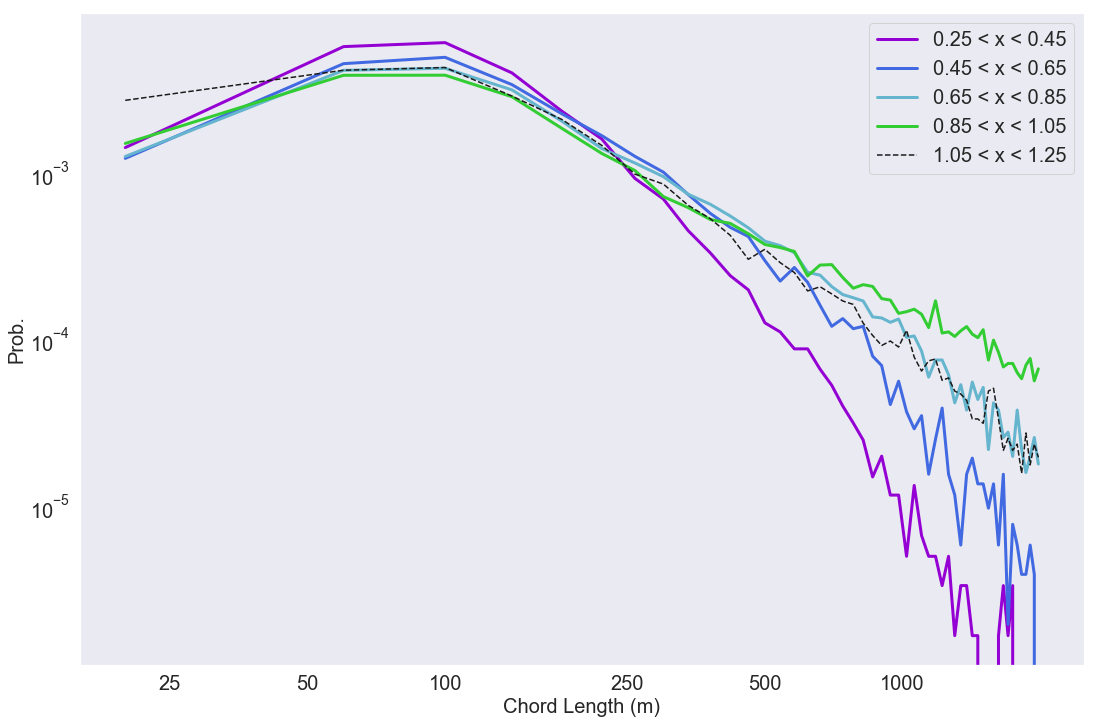

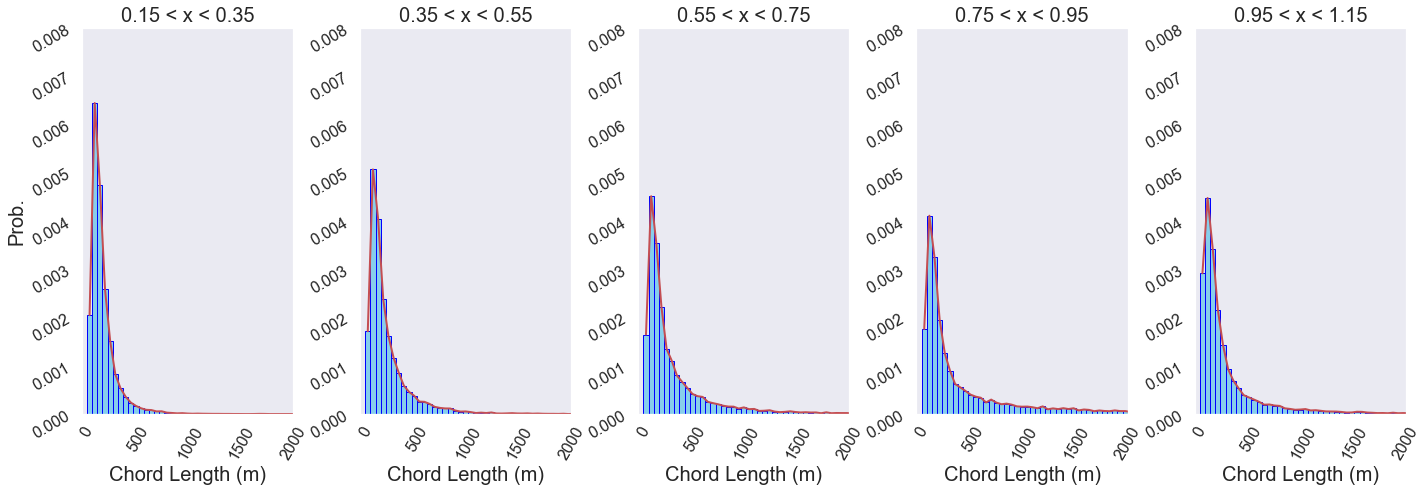

In [17]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.special import factorial
import matplotlib.cm as cm

fig = plt.figure(figsize=(18,12))
ax=fig.add_subplot(1,1,1)
cl=[]
cl2=[]
colors= ['darkviolet', 'royalblue','c','limegreen']

for i in range(len(qtiles)-1):
    if i == 4:
        cl = chordlength[idx[i]]
        cl2 = chordlength2[idx2[i]]
        nbins = 50
        chord = np.concatenate((cl,cl2))
        n, bins = np.histogram(chord,bins=50,range=(0,2000),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color='k',ls='--',label='%.2f < x < %.2f' % (qtiles[i],qtiles[i+1]))
    else:
        cl = chordlength[idx[i]]
        cl2 = chordlength2[idx2[i]]
        nbins = 50
        chord = np.concatenate((cl,cl2))
        n, bins = np.histogram(chord,bins=50,range=(0,2000),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]

        plt.plot(pdfx, pdfy,color=colors[i],lw=3,label='%.2f < x < %.2f' % (qtiles[i],qtiles[i+1]))
            
plt.grid()
# plt.xlim(-100,2000)
# plt.xlim(0,1000)
plt.legend(fontsize=20)
plt.xlabel('Chord Length (m)', fontsize=20)

plt.ylabel('Prob.',fontsize=20)

ax.set_yscale('log')
ax.set_xscale('log')

plt.xticks((25,50,100,250,500,1000),(25,50,100,250,500,1000),fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('powerpoint_plots/overlayed_pdfs_5_chord_length_zoom.png')


plt.figure(figsize=(20,7))

for i in range(len(qtiles)-1):
    plt.subplot(1,5,i+1)
    cl = chordlength[idx[i]]
    cl2 = chordlength2[idx2[i]]
    nbins = 50
    chord = np.concatenate((cl,cl2))
    plt.hist(chord,bins=50,range=(0,2500),density=1,facecolor='skyblue',edgecolor='blue')
    n, bins = np.histogram(chord,bins=50,range=(0,2500),density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    plt.title('%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1),fontsize=20)
    plt.plot(pdfx, pdfy,color='r',lw=2)
    plt.xticks(fontsize=16,rotation=60)
    plt.yticks(fontsize=16,rotation=30)

    plt.xlabel('Chord Length (m)', fontsize=20)
    plt.xlim(-50,2000)
    plt.ylim(0,0.008)
    plt.grid()
    if i == 0:
        plt.ylabel('Prob.',fontsize=20)
        
    

plt.tight_layout(w_pad=0)
# plt.savefig('powerpoint_plots/histograms_5_chord_length.png')
plt.show()

In [5]:
bot= np.squeeze(np.where((upz_norm>=0.3)&(upz_norm<0.4)))
bot2= np.squeeze(np.where((upz_norm2>=0.3)&(upz_norm2<0.4)))

mid= np.squeeze(np.where((upz_norm>=0.5)&(upz_norm<0.6)))
mid2= np.squeeze(np.where((upz_norm2>=0.5)&(upz_norm2<0.6)))

top= np.squeeze(np.where((upz_norm>=0.7)&(upz_norm<0.8)))
top2= np.squeeze(np.where((upz_norm2>=0.7)&(upz_norm2<0.8)))


top_chord = chordlength[top]
top_chord2 = chordlength2[top2]

mid_chord = chordlength[mid]
mid_chord2 = chordlength2[mid2]

bot_chord = chordlength[bot]
bot_chord2 = chordlength2[bot2]

nbins = 50
chord_top = np.concatenate((top_chord,top_chord2))
# chord_top = chord_top[~np.isnan(chord_top)]
chord_bot = np.concatenate((bot_chord,bot_chord2))
# chord_bot = chord_bot[~np.isnan(chord_bot)]
chord_mid = np.concatenate((mid_chord,mid_chord2))

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cw

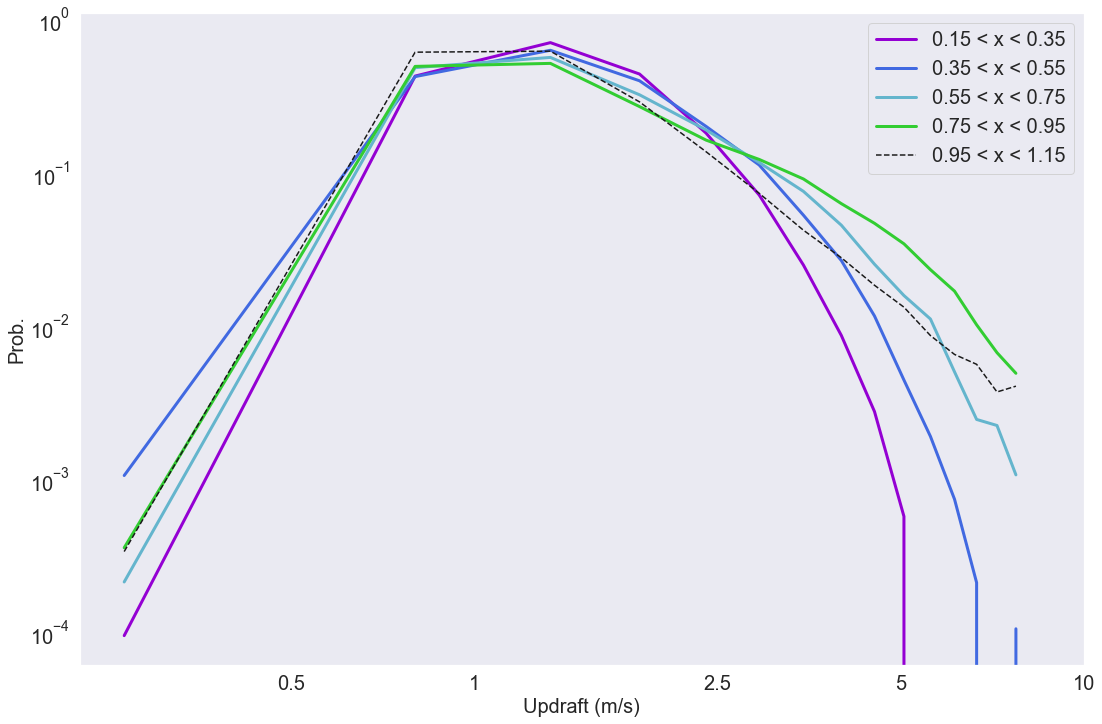

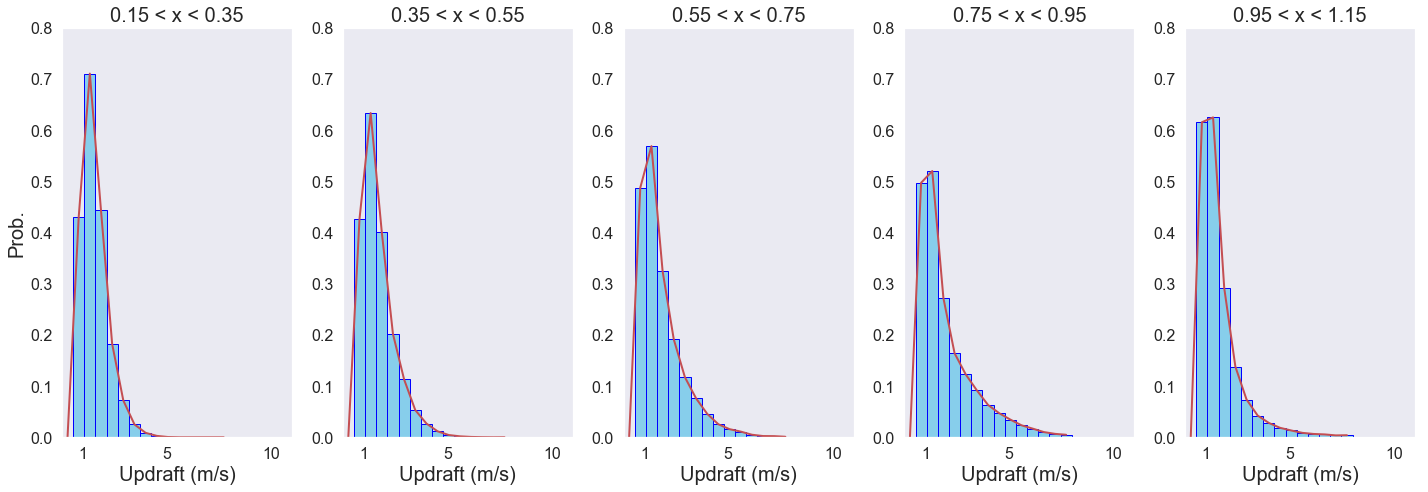

In [16]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)
cl=[]
cl2=[]
# colors = cm.rainbow(np.linspace(0, 1, len(qtiles)-1))
colors= ['darkviolet', 'royalblue','c','limegreen']

for i in range(len(qtiles)-1):
    if i == 4:
        w = upwmax_top[idx[i]]
        w2 = upwmax_top2[idx2[i]]
        nbins = 50
        updraft = np.concatenate((w,w2))
        n, bins = np.histogram(updraft,bins=15,range=(0,8),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color='k',ls='--',label='%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1))
        
    else:
        w = upwmax_top[idx[i]]
        w2 = upwmax_top2[idx2[i]]
        nbins = 50
        updraft = np.concatenate((w,w2))
        n, bins = np.histogram(updraft,bins=15,range=(0,8),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color=colors[i],lw=3,label='%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1))


        
plt.grid()
plt.legend(fontsize=20)
plt.xlabel('Updraft (m/s)', fontsize=20)

plt.ylabel('Prob.',fontsize=20)
# plt.xlim(0,11)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xticks((0.5,1,2.5,5,10),(0.5,1,2.5,5,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('powerpoint_plots/overlayed_pdfs_5_updraft.png')

plt.figure(figsize=(20,7))

for i in range(len(qtiles)-1):
    plt.subplot(1,5,i+1)
    w = upwmax_top[idx[i]]
    w2 = upwmax_top2[idx2[i]]
    nbins = 15
    updraft = np.concatenate((w,w2))
    plt.hist(updraft,bins=nbins,range=(0,8),density=1,facecolor='skyblue',edgecolor='blue')
    n, bins = np.histogram(updraft,bins=15,range=(0,8),density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    plt.title('%.2f < x < %.2f' % (qtiles[i]-.1,qtiles[i]+.1),fontsize=20)
    plt.plot(pdfx, pdfy,color='r',lw=2)
    plt.xticks((1,5,10),fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Updraft (m/s)', fontsize=20)
    plt.xlim(0,11)
    plt.ylim(0,0.8)
    plt.grid()
    if i == 0:
        plt.ylabel('Prob.',fontsize=20)


plt.tight_layout()
# plt.savefig('powerpoint_plots/histograms_5_updraft.png')

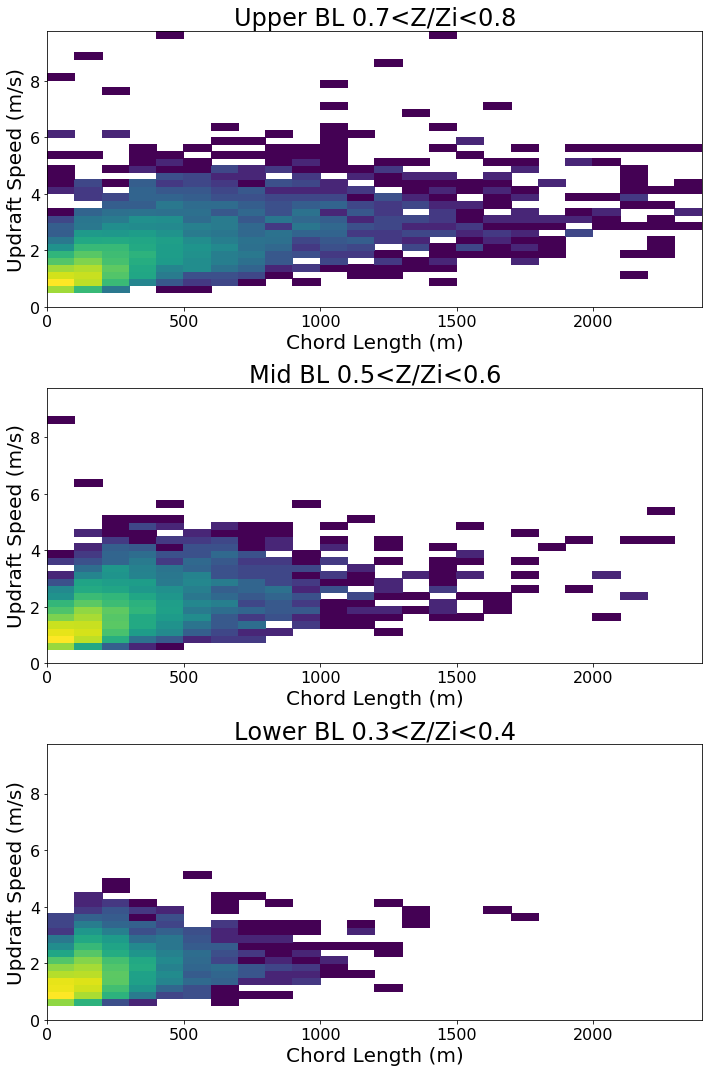

In [7]:
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm


top_w = upwmax_top[top]
top_w2 = upwmax_top2[top2]

mid_w = upwmax_top[mid]
mid_w2 = upwmax_top2[mid2]

bot_w = upwmax_top[bot]
bot_w2 = upwmax_top2[bot2]

w_top = np.concatenate((top_w,top_w2))
w_top=np.asarray(w_top)
# w_top = w_top[~np.isnan(w_top)]
# w_top_ = w_top[:6361]

w_mid = np.concatenate((mid_w,mid_w2))
w_mid=np.asarray(w_mid)

w_bot = np.concatenate((bot_w,bot_w2))
w_bot=np.asarray(w_bot)
# w_bot = w_bot[~np.isnan(w_bot)]


fig, axs = plt.subplots(3,1,figsize=(10,15))
print(axs)
plt.subplot(313)
h = plt.hist2d(chord_bot,w_bot,bins=[np.arange(0,2500,100),np.arange(0,10,0.25)], norm=LogNorm())
plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Chord Length (m)',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(311)
h = plt.hist2d(chord_top,w_top,bins=[np.arange(0,2500,100),np.arange(0,10,0.25)], norm=LogNorm())
plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
plt.xlabel('Chord Length (m)',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(312)
h = plt.hist2d(chord_mid,w_mid,bins=[np.arange(0,2500,100),np.arange(0,10,0.25)], norm=LogNorm())
plt.title('Mid BL 0.5<Z/Zi<0.6',fontsize=24)
plt.xlabel('Chord Length (m)',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# trend = np.polyfit(chord_top,w_top_, deg=1)
# trendpoly = np.poly1d(trend)
# plt.plot(chord_top, trendpoly(chord_top))
# print(trendpoly(chord_top))
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(h[3], cax=cbar_ax)#,shrink=0.6)
# plt.savefig('powerpoint_plots/histogram_2D.png')
plt.tight_layout()
plt.show()

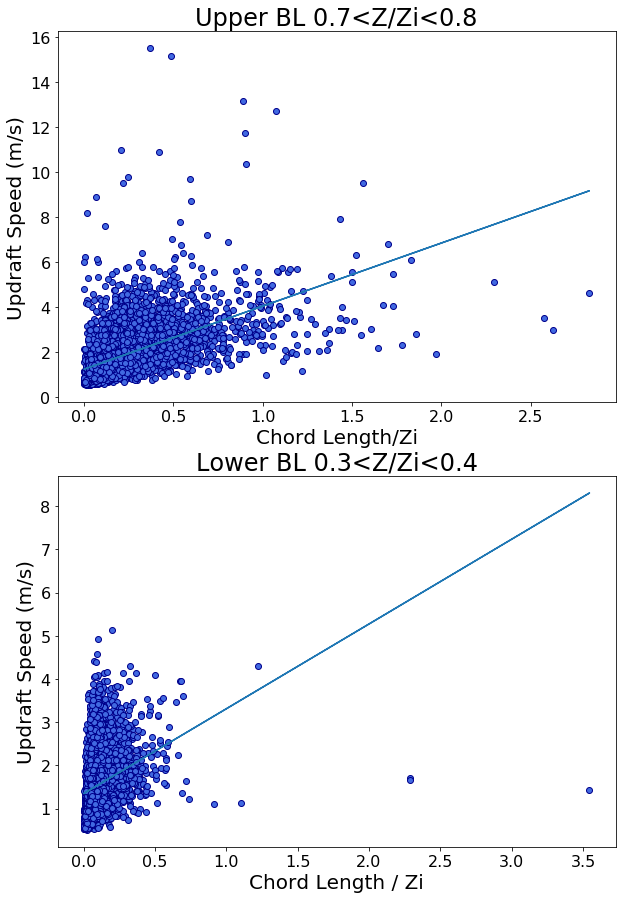

In [8]:
zi_top=upZi[top]
zi_top2=upZi2[top2]
Zi_top=np.concatenate((zi_top,zi_top2))
chord_Zi_top = chord_top/Zi_top


zi_bot=upZi[bot]
zi_bot2=upZi[bot2]
Zi_bot=np.concatenate((zi_bot,zi_bot2))
chord_Zi_bot = chord_bot/Zi_bot

zi_mid=upZi[mid]
zi_mid2=upZi[mid2]
Zi_mid=np.concatenate((zi_mid,zi_mid2))
chord_Zi_mid = chord_mid/Zi_mid

fig, axs = plt.subplots(2,1,figsize=(10,15))
print(axs)

plt.subplot(211)
plt.scatter(chord_Zi_top,w_top,c='royalblue',edgecolors='darkblue')

idx_top= np.isfinite(chord_Zi_top) & np.isfinite(w_top)
m,b = np.polyfit(chord_Zi_top[idx_top],w_top[idx_top],1)
plt.plot(chord_Zi_top[idx_top], m*chord_Zi_top[idx_top] + b)

plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
plt.xlabel('Chord Length/Zi',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(212)
plt.scatter(chord_Zi_bot,w_bot,c='royalblue',edgecolors='darkblue')

idx_bot = np.isfinite(chord_Zi_bot) & np.isfinite(w_bot)
m,b = np.polyfit(chord_Zi_bot[idx_bot],w_bot[idx_bot],1)
plt.plot(chord_Zi_bot[idx_bot], m*chord_Zi_bot[idx_bot] + b)

plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Chord Length / Zi',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less_equal
  if sys.path[0] == '':
/Users/courtneykeene/anaconda3/lib/python3.7/s

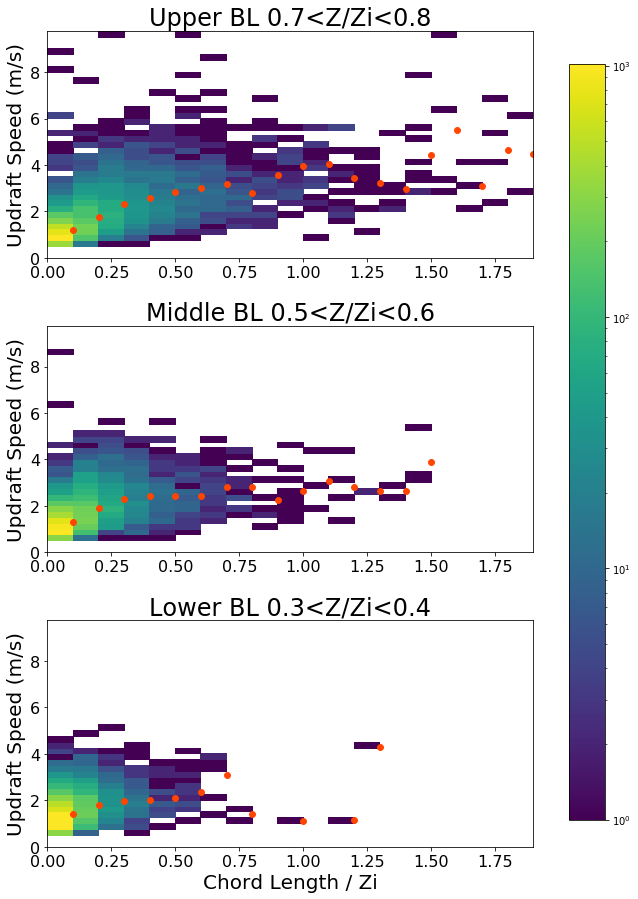

In [9]:
xbins_= np.arange(0,2,.1)
ybins_ = np.arange(0,10,0.25)

bin_mean_bot=[]
bin_mean_top=[]
bin_mean_mid=[]
for i in range(len(xbins_)):
    cidx = np.where((chord_Zi_bot>=xbins_[i-1]) & (chord_Zi_bot<=xbins_[i]))
    cidx=np.asarray(cidx)
    bin_mean_bot.append(np.mean(w_bot[cidx]))
    
    cidx_ = np.where((chord_Zi_top>=xbins_[i-1]) & (chord_Zi_top<=xbins_[i]))
    cidx_=np.asarray(cidx_)
    bin_mean_top.append(np.mean(w_top[cidx_]))
    
    cidx__ = np.where((chord_Zi_mid>=xbins_[i-1]) & (chord_Zi_mid<=xbins_[i]))
    cidx__=np.asarray(cidx__)
    bin_mean_mid.append(np.mean(w_mid[cidx__]))

fig, axs = plt.subplots(3,1,figsize=(10,15))
print(axs)
plt.subplot(313)
h = plt.hist2d(chord_Zi_bot,w_bot,bins=[np.arange(0,2,.1),np.arange(0,10,0.25)], norm=LogNorm())
plt.scatter(xbins_,bin_mean_bot,s=35,color='orangered')
plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Chord Length / Zi',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(312)
h = plt.hist2d(chord_Zi_mid,w_mid,bins=[np.arange(0,2,.1),np.arange(0,10,0.25)], norm=LogNorm())
plt.scatter(xbins_,bin_mean_mid,s=35,color='orangered')
plt.title('Middle BL 0.5<Z/Zi<0.6',fontsize=24)
# plt.xlabel('Chord Length / Zi',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(311)
h = plt.hist2d(chord_Zi_top,w_top,bins=[np.arange(0,2,.1),np.arange(0,10,0.25)], norm=LogNorm())
plt.scatter(xbins_,bin_mean_top,s=35,color='orangered')
plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
# plt.xlabel('Chord Length / Zi',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# trend = np.polyfit(chord_top,w_top_, deg=1)
# trendpoly = np.poly1d(trend)
# plt.plot(chord_top, trendpoly(chord_top))
# print(trendpoly(chord_top))
fig.subplots_adjust(right=0.8,hspace=0.3)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(h[3], cax=cbar_ax)#,shrink=0.6)
plt.savefig('histogram_2D.png')
plt.show()

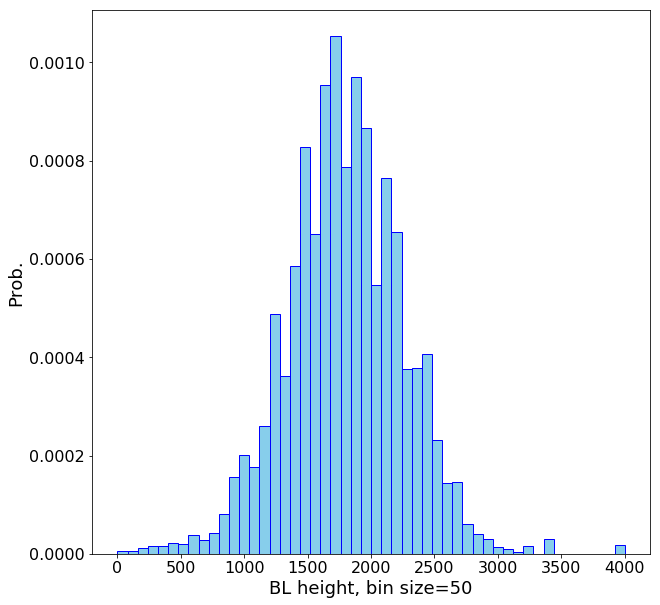

(4326,)


In [10]:
plt.figure(figsize=(10,10))

plt.hist(Zi,bins=50,range=(0,4000),density=1,facecolor='skyblue',edgecolor='blue')
plt.ylabel('Prob.',fontsize=18)
plt.xlabel('BL height, bin size=50',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print(np.shape(top))

In [11]:
uparea_t=uparea[top]
uparea2_t=uparea2[top2]
UpArea_t=np.concatenate((uparea_t,uparea2_t))

uparea_b=uparea[bot]
uparea2_b=uparea2[bot2]
UpArea_b=np.concatenate((uparea_b,uparea2_b))

uparea_m=uparea[mid]
uparea2_m=uparea2[mid2]
UpArea_m=np.concatenate((uparea_m,uparea2_m))

# plt.hist(UpArea_t,bins=50,range=(int(min(uparea_t)),int(max(uparea_t))))
# plt.xlim(0,1000000)
# plt.show()
# plt.hist(UpArea_b,bins=50,range=(int(min(uparea_b)),int(max(uparea_b))))
# plt.xlim(0,200000)
# plt.show()
# plt.figure()

ybins_= np.arange(0,10,0.25)
xbins_ = np.arange(0,10000000,20000)
xbins_b = np.arange(0,200000,4000)
bin_areamean_bot=[]
bin_areamean_top=[]
bin_areamean_mid=[]
for i in range(len(xbins_)):
    cidx = np.where((UpArea_t>=xbins_[i-1]) & (UpArea_t<=xbins_[i]))
    cidx=np.asarray(cidx)
    bin_areamean_top.append(np.mean(w_top[cidx]))
    
    mcidx = np.where((UpArea_m>=xbins_[i-1]) & (UpArea_m<=xbins_[i]))
    mcidx=np.asarray(mcidx)
    bin_areamean_mid.append(np.mean(w_mid[mcidx]))  
    
for i in range(len(xbins_b)):  
    cidx_ = np.where((UpArea_b>=xbins_b[i-1]) & (UpArea_b<=xbins_b[i]))
    cidx_=np.asarray(cidx_)
    bin_areamean_bot.append(np.mean(w_bot[cidx_]))



/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal


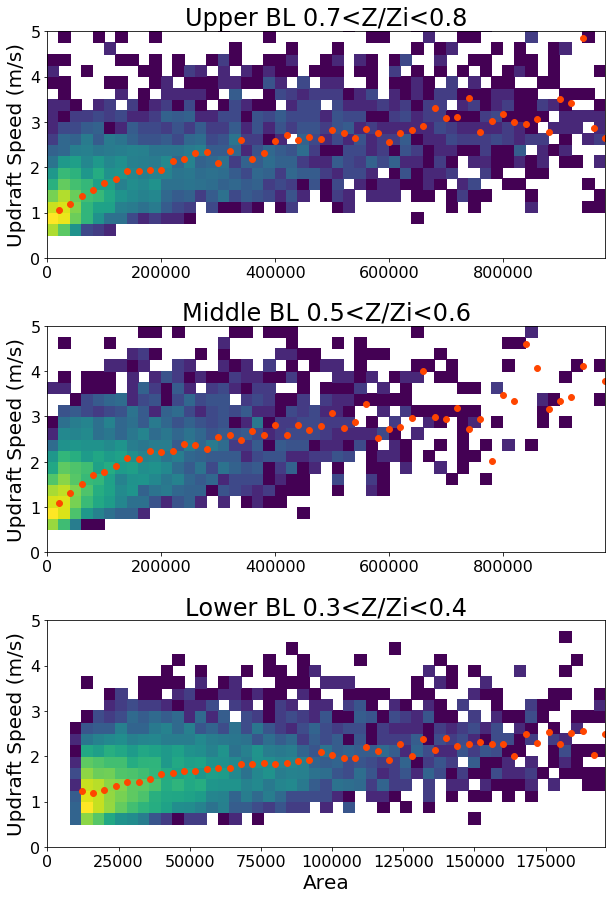

In [12]:
fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(313)
h = plt.hist2d(UpArea_b,w_bot,bins=[np.arange(0,200000,4000),np.arange(0,10,0.25)], norm=LogNorm())
plt.scatter(xbins_b,bin_areamean_bot,s=35,color='orangered')
plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Area',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,5)

plt.subplot(311)
h = plt.hist2d(UpArea_t,w_top,bins=[np.arange(0,1000000,20000),np.arange(0,10,0.25)], norm=LogNorm())
plt.scatter(xbins_,bin_areamean_top,s=35,color='orangered')
plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
# plt.xlabel('Area',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,5)

plt.subplot(312)
h = plt.hist2d(UpArea_m,w_mid,bins=[np.arange(0,1000000,20000),np.arange(0,10,0.25)], norm=LogNorm())
plt.scatter(xbins_,bin_areamean_mid,s=35,color='orangered')
plt.title('Middle BL 0.5<Z/Zi<0.6',fontsize=24)
# plt.xlabel('Area',fontsize=20)
plt.ylabel('Updraft Speed (m/s)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,5)
fig.subplots_adjust(hspace=0.3)

plt.show()

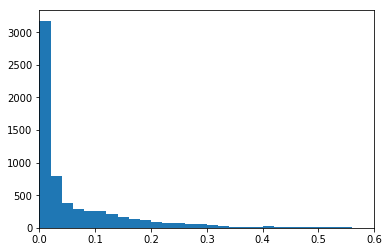

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less_equal
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less_equal


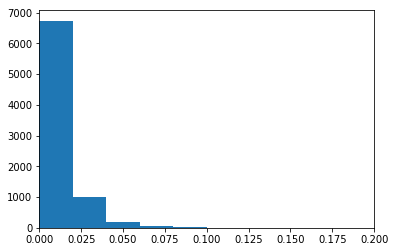

In [13]:
upwstar_t=upwstar[top]
upwstar2_t=upwstar2[top2]
UpWstar_t=np.concatenate((upwstar_t,upwstar2_t))

upwstar_b=upwstar[bot]
upwstar2_b=upwstar2[bot2]
UpWstar_b=np.concatenate((upwstar_b,upwstar2_b))

upwstar_m=upwstar[mid]
upwstar2_m=upwstar2[mid2]
UpWstar_m=np.concatenate((upwstar_m,upwstar2_m))

w_wstar_t = w_top/UpWstar_t
w_wstar_b = w_bot/UpWstar_b
w_wstar_m = w_mid/UpWstar_m

# plt.hist(w_wstar_t,bins=50,range=(int(np.nanmin(w_wstar_t)),int(np.nanmax(w_wstar_t))))
# plt.xlim(0,6)
# plt.show()
# plt.hist(w_wstar_b,bins=50,range=(int(np.nanmin(w_wstar_b)),int(np.nanmax(w_wstar_b))))
# plt.xlim(0,6)
# plt.show()

norm_area_t = UpArea_t/(Zi_top**2)
norm_area_b = UpArea_b/(Zi_bot**2)
norm_area_m = UpArea_m/(Zi_mid**2)

plt.hist(norm_area_t,bins=50,range=(int(np.nanmin(norm_area_t)),int(np.nanmax(norm_area_t))))
plt.xlim(0,.6)
plt.show()
plt.hist(norm_area_b[norm_area_b<=2],bins=50,range=(int(np.nanmin(norm_area_b[norm_area_b<=2])),
                                                   int(np.nanmax(norm_area_b[norm_area_b<=2]))))
plt.xlim(0,.2)
plt.show()

/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater_equal
  del sys.path[0]
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/Users/courtneykeene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as a

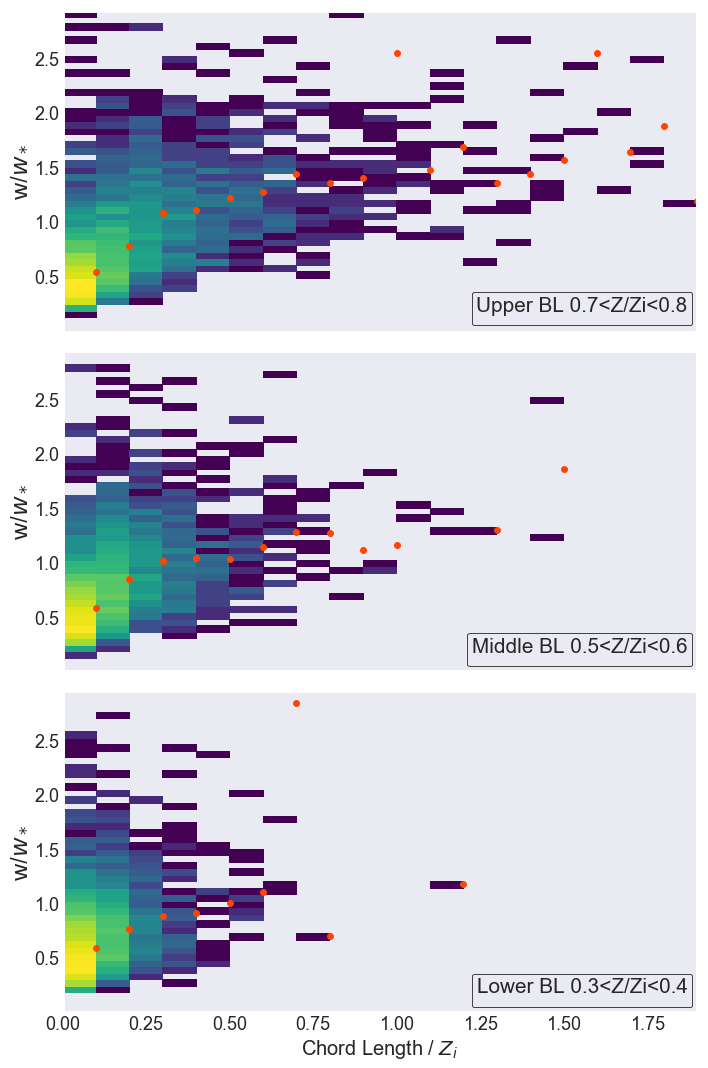

In [21]:
ybins_= np.arange(0,3,0.06)
xbins_ = np.arange(0,2,.1)
xbins_b = np.arange(0,2,.1)

bin_norm_bot=[]
bin_norm_top=[]
bin_norm_mid=[]
for i in range(len(xbins_)):
    cidx = np.where((chord_Zi_top>=xbins_[i-1]) & (chord_Zi_top<=xbins_[i]))
    cidx=np.asarray(cidx)
    bin_norm_top.append(np.nanmean(w_wstar_t[cidx]))
    
    mcidx = np.where((chord_Zi_mid>=xbins_[i-1]) & (chord_Zi_mid<=xbins_[i]))
    mcidx=np.asarray(mcidx)
    bin_norm_mid.append(np.nanmean(w_wstar_m[mcidx]))
    
for i in range(len(xbins_b)):  
    cidx_ = np.where((chord_Zi_bot>=xbins_b[i-1]) & (chord_Zi_bot<=xbins_b[i]))
    cidx_=np.asarray(cidx_)
    bin_norm_bot.append(np.nanmean(w_wstar_b[cidx_]))


fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,15),sharex=True)
fig.subplots_adjust(0,0,1,1,0,0)



# plt.subplot(313)
h = ax3.hist2d(chord_Zi_bot,w_wstar_b,bins=[np.arange(0,2,.1),ybins_], norm=LogNorm(),cmap='viridis')
ax3.scatter(xbins_b,bin_norm_bot,s=35,color='orangered')
# plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel(r'Chord Length / $Z_i$',fontsize=20)
ax3.set_ylabel(r'w/$w_*$',fontsize=24)
ax3.set_yticks(np.arange(0.5,3,0.5))
# plt.set_yticks(fontsize=16)
ax3.tick_params(axis='both',direction='in',length=6,width=3,labelsize=18)
leg3=ax3.legend(title='Lower BL 0.3<Z/Zi<0.4',title_fontsize='xx-large',loc=4)
leg3.get_frame().set_edgecolor('k')
for axis in ['bottom','left','right']:
  ax3.spines[axis].set_linewidth(3)

# plt.ylim(0,5)

# plt.subplot(311)
h = ax1.hist2d(chord_Zi_top,w_wstar_t,bins=[np.arange(0,2,.1),ybins_], norm=LogNorm(),cmap='viridis')
ax1.scatter(xbins_,bin_norm_top,s=35,color='orangered')
# plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
# plt.xlabel('Area',fontsize=20)
ax1.set_ylabel(r'w/$w_*$',fontsize=24)
# plt.xticks(fontsize=16)
ax1.set_yticks(np.arange(0.5,3,0.5))
ax1.tick_params(axis='both',direction='in',length=6,width=3,labelsize=18)
leg1=ax1.legend(title='Upper BL 0.7<Z/Zi<0.8',title_fontsize='xx-large',loc=4)
leg1.get_frame().set_edgecolor('k')
for axis in ['top','left','right']:
  ax1.spines[axis].set_linewidth(3)


# plt.subplot(312)
h = ax2.hist2d(chord_Zi_mid,w_wstar_m,bins=[np.arange(0,2,.1),ybins_], norm=LogNorm(),cmap='viridis')
ax2.scatter(xbins_,bin_norm_mid,s=35,color='orangered')
# plt.title('Middle BL 0.5<Z/Zi<0.6',fontsize=24)
# plt.xlabel('Area',fontsize=20)
ax2.set_ylabel(r'w/$w_*$',fontsize=24)
# plt.xticks(fontsize=16)
ax2.set_yticks(np.arange(0.5,3,0.5))
ax2.tick_params(axis='both',direction='in',length=6,width=3,labelsize=18)
leg2=ax2.legend(title='Middle BL 0.5<Z/Zi<0.6',title_fontsize='xx-large',loc=4)
leg2.get_frame().set_edgecolor('k')
for axis in ['left','right']:
  ax2.spines[axis].set_linewidth(3)
for axis in ['top','bottom']:
  ax2.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('../images/histogram2d.png')
plt.show()

In [ ]:
ybins_= np.arange(0,3,0.06)
xbins_ = np.arange(0,10000000,20000)
xbins_b = np.arange(0,200000,4000)

bin_norm_bot=[]
bin_norm_top=[]
bin_norm_mid=[]
for i in range(len(xbins_)):
    cidx = np.where((UpArea_t>=xbins_[i-1]) & (UpArea_t<=xbins_[i]))
    cidx=np.asarray(cidx)
    bin_norm_top.append(np.nanmean(w_wstar_m[cidx]))
    
    mcidx = np.where((UpArea_m>=xbins_[i-1]) & (UpArea_m<=xbins_[i]))
    mcidx=np.asarray(mcidx)
    bin_norm_mid.append(np.nanmean(w_wstar_m[mcidx]))
    
for i in range(len(xbins_b)):  
    cidx_ = np.where((UpArea_b>=xbins_b[i-1]) & (UpArea_b<=xbins_b[i]))
    cidx_=np.asarray(cidx_)
    bin_norm_bot.append(np.nanmean(w_wstar_b[cidx_]))


fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(313)
h = plt.hist2d(UpArea_b,w_wstar_b,bins=[np.arange(0,200000,4000),ybins_], norm=LogNorm())
plt.scatter(xbins_b,bin_norm_bot,s=35,color='orangered')
plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Area',fontsize=20)
plt.ylabel('w/wstar',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(0,5)

plt.subplot(311)
h = plt.hist2d(UpArea_t,w_wstar_t,bins=[np.arange(0,1000000,20000),ybins_], norm=LogNorm())
plt.scatter(xbins_,bin_norm_top,s=35,color='orangered')
plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
# plt.xlabel('Area',fontsize=20)
plt.ylabel('w/wstar',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(312)
h = plt.hist2d(UpArea_m,w_wstar_m,bins=[np.arange(0,1000000,20000),ybins_], norm=LogNorm())
plt.scatter(xbins_,bin_norm_mid,s=35,color='orangered')
plt.title('Middle BL 0.5<Z/Zi<0.6',fontsize=24)
# plt.xlabel('Area',fontsize=20)
plt.ylabel('w/wstar',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [ ]:
ybins_= np.arange(0,3,0.06)
xbins_ = np.linspace(0,0.6,50)
xbins_b = np.linspace(0,0.2,50)

bin_norm_bot=[]
bin_norm_top=[]
bin_norm_bot=[]
bin_norm_mid=[]
for i in range(len(xbins_)):
    cidx = np.where((norm_area_t>=xbins_[i-1]) & (norm_area_t<=xbins_[i]))
    cidx=np.asarray(cidx)
    bin_norm_top.append(np.nanmedian(w_wstar_t[cidx]))
    
    mcidx = np.where((norm_area_m>=xbins_[i-1]) & (norm_area_m<=xbins_[i]))
    mcidx=np.asarray(mcidx)
    bin_norm_mid.append(np.nanmedian(w_wstar_m[mcidx]))
    
for i in range(len(xbins_b)):  
    cidx_ = np.where((norm_area_b>=xbins_b[i-1]) & (norm_area_b<=xbins_b[i]))
    cidx_=np.asarray(cidx_)
    bin_norm_bot.append(np.nanmedian(w_wstar_b[cidx_]))


fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(313)
h = plt.hist2d(norm_area_b,w_wstar_b,bins=[xbins_b,ybins_], norm=LogNorm())
plt.scatter(xbins_b,bin_norm_bot,s=35,color='orangered')
plt.title('Lower BL 0.3<Z/Zi<0.4',fontsize=24)
plt.xlabel('Normalized area',fontsize=20)
plt.ylabel('w/wstar',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,0.6)
# plt.ylim(0,5)

plt.subplot(311)
h = plt.hist2d(norm_area_t,w_wstar_t,bins=[xbins_,ybins_], norm=LogNorm())
plt.scatter(xbins_,bin_norm_top,s=35,color='orangered')
plt.title('Upper BL 0.7<Z/Zi<0.8',fontsize=24)
# plt.xlabel('Normalized area',fontsize=20)
plt.ylabel('w/wstar',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(312)
h = plt.hist2d(norm_area_m,w_wstar_m,bins=[xbins_,ybins_], norm=LogNorm())
plt.scatter(xbins_,bin_norm_mid,s=35,color='orangered')
plt.title('Middle BL 0.5<Z/Zi<0.6',fontsize=24)
# plt.xlabel('Normalized area',fontsize=20)
plt.ylabel('w/wstar',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18,12))
ax=fig.add_subplot(1,1,1)
ncl=[]
ncl2=[]
colors= ['darkviolet', 'royalblue','c','limegreen']

for i in range(len(qtiles)-1):
    if i == 4:
        ncl = chordlength[idx[i]]/(upZi[idx[i]])
        ncl2 = chordlength2[idx2[i]]/(upZi2[idx2[i]])
        nbins = 50
        nchord = np.concatenate((ncl,ncl2))
        n, bins = np.histogram(nchord,bins=50,range=(0,6),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color='k',lw=2.5,ls='--',label='%.2f < x < %.2f' % (qtiles[i],qtiles[i+1]))
    else:
        ncl = chordlength[idx[i]]/(upZi[idx[i]])
        ncl2 = chordlength2[idx2[i]]/(upZi2[idx2[i]])
        nbins = 50
        nchord = np.concatenate((ncl,ncl2))
        n, bins = np.histogram(nchord,bins=50,range=(0,6),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]

        plt.plot(pdfx, pdfy,color=colors[i],lw=3,label='%.2f < x < %.2f' % (qtiles[i],qtiles[i+1]))
  
plt.title('All Updrafts',fontweight='bold',fontsize=40)          
plt.grid()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

leg=plt.legend(fontsize=30,frameon=True)
leg.get_frame().set_edgecolor('k')

plt.xlabel(r'Chord Length/Z$_i$',fontweight='bold',fontsize=36)

plt.ylabel('Prob.',fontweight='bold',fontsize=36)

ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(direction='in',length=9,width=3)

plt.xticks((0.05,0.1,0.25,0.5,1,2,3,4,5,6),(0.05,0.1,0.25,0.5,1,2,3,4,5,6),fontsize=30)
plt.yticks(fontsize=30)

plt.savefig('powerpoint_plots/pdfs_updrafts.png')

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1)
nw=[]
nw2=[]
# colors = cm.rainbow(np.linspace(0, 1, len(qtiles)-1))
colors= ['darkviolet', 'royalblue','c','limegreen']

for i in range(len(qtiles)-1):
    if i == 4:
        nw = upwmax_top[idx[i]]/(upwstar[idx[i]])
        nw2 = upwmax_top2[idx2[i]]/(upwstar2[idx2[i]])
        nbins = 50
        nupdraft = np.concatenate((nw,nw2))
        n, bins = np.histogram(nupdraft,bins=15,range=(0,6),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color='k',lw=2.5,ls='--',label='%.2f < x < %.2f' % (qtiles[i],qtiles[i+1]))
        
    else:
        nw = upwmax_top[idx[i]]/(upwstar[idx[i]])
        nw2 = upwmax_top2[idx2[i]]/(upwstar2[idx2[i]])
        nbins = 50
        nupdraft = np.concatenate((nw,nw2))
        n, bins = np.histogram(nupdraft,bins=15,range=(0,6),density=1)
        pdfx = np.zeros(n.size)
        pdfy = np.zeros(n.size)
        for k in range(n.size):
            pdfx[k] = 0.5*(bins[k]+bins[k+1])
            pdfy[k] = n[k]


        plt.plot(pdfx, pdfy,color=colors[i],lw=3,label='%.2f < x < %.2f' % (qtiles[i],qtiles[i+1]))


plt.title('All Updrafts',fontweight='bold',fontsize=40)        
plt.grid()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

leg=plt.legend(fontsize=30,frameon=True)
leg.get_frame().set_edgecolor('k')

plt.xlabel(r'w/w$_*$',fontweight='bold',fontsize=36)

plt.ylabel('Prob.',fontweight='bold',fontsize=36)
# plt.xlim(0,11)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xticks((0.25,0.5,1,2,3,4,5,6),(0.25,0.5,1,2,3,4,5,6),fontsize=30)
ax.tick_params(direction='in',length=9,width=3)
plt.yticks(fontsize=30)
plt.savefig('powerpoint_plots/pdfs_updrafts_wwstar.png')